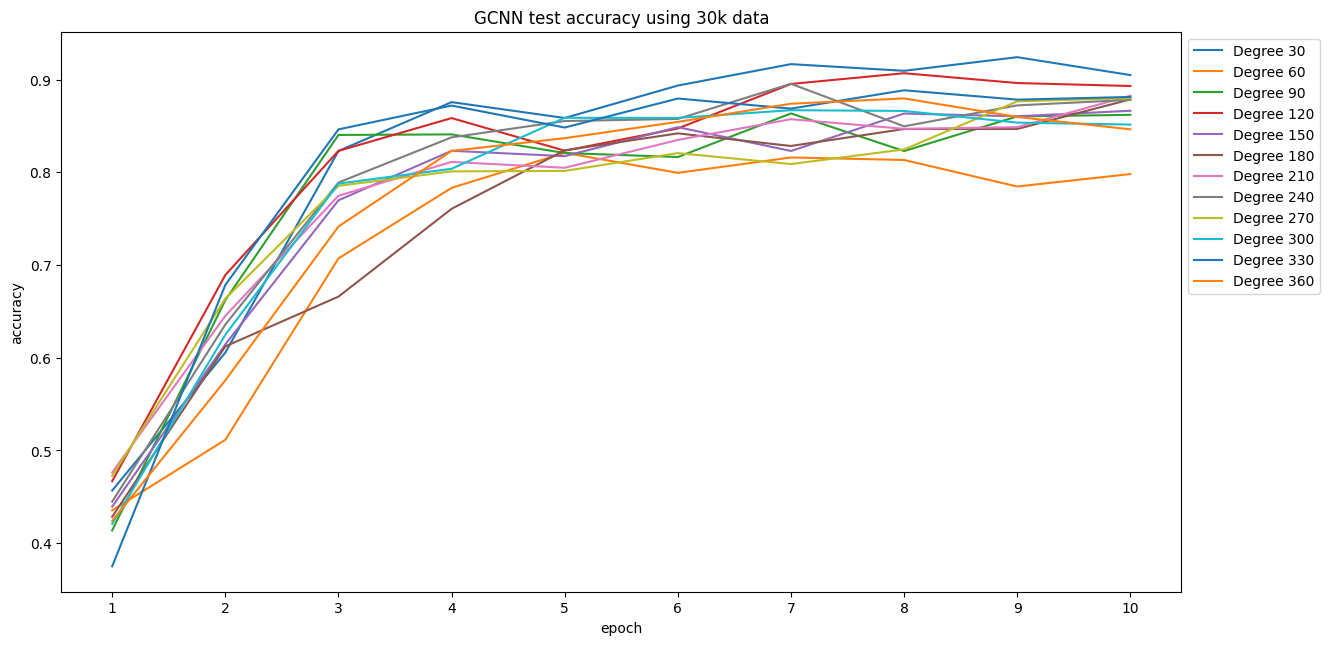

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re  # Import the re module for regular expressions

# Create a list of the 12 CSV file names
csv_files = ["run-GCNN_30000_data_deg30_version_1-tag-val_acc.csv", "run-GCNN_30000_data_deg60_version_1-tag-val_acc.csv", "run-GCNN_30000_data_deg90_version_1-tag-val_acc.csv", "run-GCNN_30000_data_deg120_version_1-tag-val_acc.csv", "run-GCNN_30000_data_deg150_version_1-tag-val_acc.csv", "run-GCNN_30000_data_deg180_version_1-tag-val_acc.csv",
             "run-GCNN_30000_data_deg210_version_1-tag-val_acc.csv", "run-GCNN_30000_data_deg240_version_1-tag-val_acc.csv", "run-GCNN_30000_data_deg270_version_1-tag-val_acc.csv", "run-GCNN_30000_data_deg300_version_1-tag-val_acc.csv", "run-GCNN_30000_data_deg330_version_1-tag-val_acc.csv", "run-GCNN_30000_data_deg360_version_2-tag-val_acc.csv"]

# run-GCNN_60000_data_deg30_version_0-tag-val_loss
# Create a larger figure for plotting
plt.figure(figsize=(14, 8))

# Initialize a DataFrame to store all data
combined_data = pd.DataFrame()

# Define the x-axis step values (1 to 10)
step_values = range(1, 11)

# Iterate through the CSV files
for file_name in csv_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_name, delimiter=',', skiprows=[0], names=["Wall time", "Step", "Value"])
    
    # Extract data columns
    value = df["Value"]
    
    # Extract the degree from the file name using regular expressions
    degree_match = re.search(r"deg(\d+)", file_name)
    if degree_match:
        degree = degree_match.group(1)
    else:
        degree = "Unknown"  # Handle cases where degree is not found in the filename
    
    # Combine data into the DataFrame
    combined_data[degree] = value

# Plot the combined data
for column in combined_data.columns:
    plt.plot(step_values, combined_data[column], label=f"Degree {column}")

# Customize the plot
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("GCNN test accuracy using 30k data")

# Set x-axis ticks to be the specified step values
plt.xticks(step_values)

# Adjust the subplot position to create space for x-ticks
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9)

# Place the legend outside the plot to the right
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()
